# 3.0-Normalization and Embedding 

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-09"

## Introduction

Normalize data and create embeddings for each time point fraction

In [2]:
timepoint <- "T3"

## Libraries

In [3]:
suppressMessages(suppressWarnings({
library(Seurat)
library(tidyverse)
library(grid)
library(gridExtra)
library(ggplot2)
library(scater) 
library(scran)
}))

## Parameters

In [4]:
#here::dr_here(show_reason = TRUE)
source(here::here("SCGRES_83_84/sc_analysis/misc/paths.R"))

"{clust}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{clust}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

## Load data

In [5]:
seurat_obj <- readRDS(here::here(glue::glue("{qc}/{robj_dir}/clean_combined_object_{timepoint}.rds")))

In [6]:
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_org,timepoint,replicate,sample_id,pct_mt,percent.ribo,doublet_score,doublet_pred
,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
T3_1_AAACCTGAGACCTTTG-1,SCGRES_83_84,2299,1350,OS0028_1,T3,1,T3_1,3.4362766,15.3110048,0.02678571,FALSE
T3_1_AAACCTGAGAGGTACC-1,SCGRES_83_84,14148,4032,OS0028_1,T3,1,T3_1,2.9827537,14.1433418,0.06915584,FALSE
T3_1_AAACCTGAGATCTGAA-1,SCGRES_83_84,4725,277,OS0028_1,T3,1,T3_1,0.1058201,0.6349206,0.02837640,FALSE
T3_1_AAACCTGAGCGTTGCC-1,SCGRES_83_84,4172,1625,OS0028_1,T3,1,T3_1,3.1160115,25.0958773,0.02730670,FALSE
T3_1_AAACCTGAGGACTGGT-1,SCGRES_83_84,7814,2734,OS0028_1,T3,1,T3_1,3.1609931,10.1868441,0.06213152,FALSE
T3_1_AAACCTGAGGATGCGT-1,SCGRES_83_84,2287,1287,OS0028_1,T3,1,T3_1,3.5854832,17.7962396,0.38117182,TRUE


## Normalization and linear dimensional reduction

In [7]:
seurat_obj <- NormalizeData(
  seurat_obj,
  normalization.method = "LogNormalize",
  scale.factor = 1e4
)

In [8]:
sce <- as.SingleCellExperiment(seurat_obj)
sce

class: SingleCellExperiment 
dim: 29117 39817 
metadata(0):
assays(2): counts logcounts
rownames(29117): AL627309.1 AL627309.3 ... EIF1AY LINC00266-4P
rowData names(0):
colnames(39817): T3_1_AAACCTGAGACCTTTG-1 T3_1_AAACCTGAGAGGTACC-1 ...
  T3_2_TTTGTCATCTTAGCCC-1 T3_2_TTTGTCATCTTTAGGG-1
colData names(12): orig.ident nCount_RNA ... doublet_pred ident
reducedDimNames(0):
mainExpName: RNA
altExpNames(0):

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


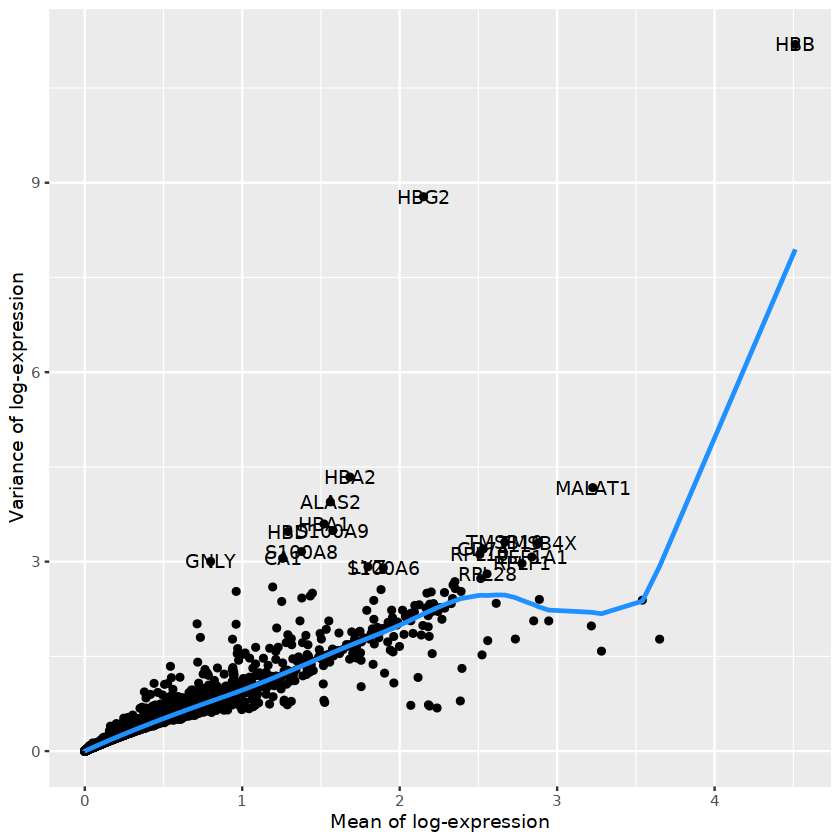

In [9]:
gene_var <- modelGeneVar(sce)

tops <- gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

gene_var %>% 
  as.data.frame() %>% 
  ggplot(aes(mean, total)) +
  geom_point() +
  geom_line(aes(y = tech), colour = "dodgerblue", size = 1) +
  labs(x = "Mean of log-expression", y = "Variance of log-expression")+
  geom_text(data=tops, aes(mean,total,label=rownames(tops)))

In [10]:
gene_var %>% 
    as.data.frame() %>% 
    arrange(desc(total)) %>% 
    head(n=20)

,mean,total,tech,bio,p.value,FDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HBB,4.5127319,11.189809,7.9451449,3.2446641,1.615306e-03,5.669077e-02
HBG2,2.1516124,8.779048,2.1729848,6.6060631,7.940512e-107,5.733844e-103
HBA2,1.6838736,4.339866,1.6724478,2.6674182,6.509300e-31,4.178103e-28
MALAT1,3.2260618,4.172297,2.1949908,1.9773059,4.125218e-11,6.367266e-09
ALAS2,1.5596975,3.945816,1.5439716,2.4018443,1.667231e-29,1.046876e-26
HBA1,1.5193117,3.596600,1.5005634,2.0960361,3.646651e-24,1.785252e-21
S100A9,1.5753319,3.491783,1.5603428,1.9314406,2.205671e-19,7.769342e-17
HBD,1.2905868,3.476381,1.2559289,2.2204524,1.577296e-37,1.627093e-34
TMSB10,2.6673343,3.309773,2.4712608,0.8385122,7.207141e-03,1.805473e-01


In [11]:
hvgs <- getTopHVGs(gene_var,fdr.threshold = 0.05)
length(hvgs)

[1] 804

In [12]:
# remove TCR genes
hvgs <- hvgs[!grepl("^TR[ABDG][VJC]", hvgs)]

# remove hemoglobin genes
hvgs <- hvgs[!grepl("HBA[12]|HBB|HBD|HBG[12]", hvgs)]
length(hvgs)

[1] 709

In [13]:
seurat_obj <- seurat_obj %>%
  ScaleData(features=hvgs) %>% 
  RunPCA(features=hvgs)

Centering and scaling data matrix

PC_ 1 
Positive:  SLC25A37, SNCA, ALAS2, AHSP, SLC4A1, CA1, SELENBP1, DCAF12, BCL2L1, SLC25A39 
	   BPGM, FECH, IFIT1B, HBM, HEMGN, ANK1, MYL4, IFI30, LYZ, IFI27 
	   S100A9, FCN1, AIF1, S100A8, LST1, VCAN, KRT1, HMBS, IL1B, CST3 
Negative:  NKG7, CTSW, CD247, CD7, GNLY, IFITM1, PRF1, IL2RB, GZMA, CST7 
	   IL2RG, SKAP1, PRKCH, KLRK1, ZAP70, KLRD1, SLC38A1, KLRB1, CD69, CD96 
	   SYNE1, GZMM, KLRF1, MCTP2, GZMB, TNFAIP3, HOPX, IL32, STAT4, CCL5 
PC_ 2 
Positive:  ALAS2, AHSP, SNCA, SLC25A39, SLC4A1, BPGM, CA1, BCL2L1, SELENBP1, DCAF12 
	   FECH, SLC25A37, IFIT1B, HBM, HEMGN, MYL4, ANK1, IFI27, KRT1, HMBS 
	   AC104389.5, TMCC2, ARG1, SPTA1, RHAG, THEM5, FHDC1, RGS6, RIPOR3, CD247 
Negative:  S100A6, IFI30, HLA-DRB1, AIF1, HLA-DRA, CST3, TMSB4X, NAMPT, LYZ, FCN1 
	   LST1, S100A9, WARS, S100A8, VCAN, HLA-DPA1, HLA-DPB1, IL1B, NCF1, MALAT1 
	   FCAR, IER3, APOBEC3A, CYP1B1, S100A12, THBS1, CXCL8, HLA-DQA1, SERPINB2, G0S2 
PC_ 3 
Positive:  JCHAIN, LILRA

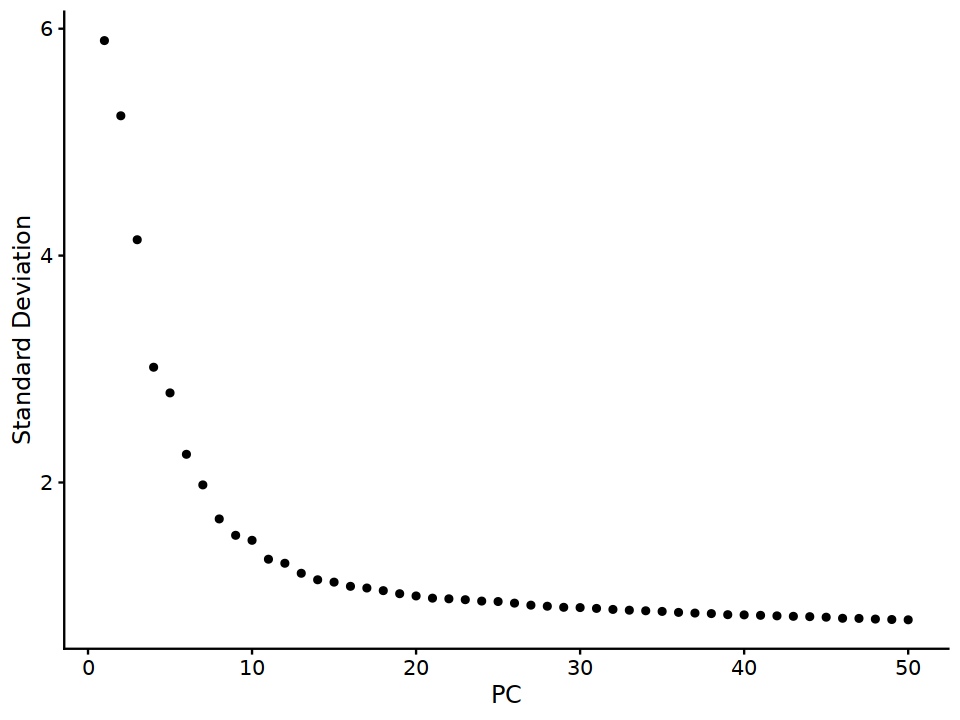

In [14]:
options(repr.plot.width = 8, repr.plot.height = 6)
ElbowPlot(seurat_obj, n=50)

In [15]:
ProjectDim(seurat_obj, reduction = "pca")

PC_ 1 
Positive:  SLC25A37, SNCA, ALAS2, AHSP, SLC4A1, CA1, SELENBP1, DCAF12, BCL2L1, SLC25A39 
	   BPGM, FECH, IFIT1B, HBM, HEMGN, ANK1, MYL4, IFI30, LYZ, IFI27 
Negative:  NKG7, CTSW, CD247, CD7, GNLY, IFITM1, PRF1, IL2RB, GZMA, CST7 
	   IL2RG, SKAP1, PRKCH, KLRK1, ZAP70, KLRD1, SLC38A1, KLRB1, CD69, CD96 
PC_ 2 
Positive:  ALAS2, AHSP, SNCA, SLC25A39, SLC4A1, BPGM, CA1, BCL2L1, SELENBP1, DCAF12 
	   FECH, SLC25A37, IFIT1B, HBM, HEMGN, MYL4, ANK1, IFI27, KRT1, HMBS 
Negative:  S100A6, IFI30, HLA-DRB1, AIF1, HLA-DRA, CST3, TMSB4X, NAMPT, LYZ, FCN1 
	   LST1, S100A9, WARS, S100A8, VCAN, HLA-DPA1, HLA-DPB1, IL1B, NCF1, MALAT1 
PC_ 3 
Positive:  JCHAIN, LILRA4, SERPINF1, NIBAN3, CLEC4C, RHEX, IGKC, ITM2C, MZB1, DERL3 
	   PTPRS, SPIB, LINC01374, LINC01478, TCF4, AC023590.1, CUX2, COBLL1, PLD4, RGS7 
Negative:  S100A9, S100A8, FCN1, LYZ, VCAN, IFI30, FCAR, IL1B, NAMPT, THBS1 
	   S100A12, IER3, CYP1B1, CXCL8, AIF1, APOBEC3A, LST1, SERPINB2, WARS, PPBP 
PC_ 4 
Positive:  GZMB, CCL5, ADGRG

An object of class Seurat 
29117 features across 39817 samples within 1 assay 
Active assay: RNA (29117 features, 0 variable features)
 1 dimensional reduction calculated: pca

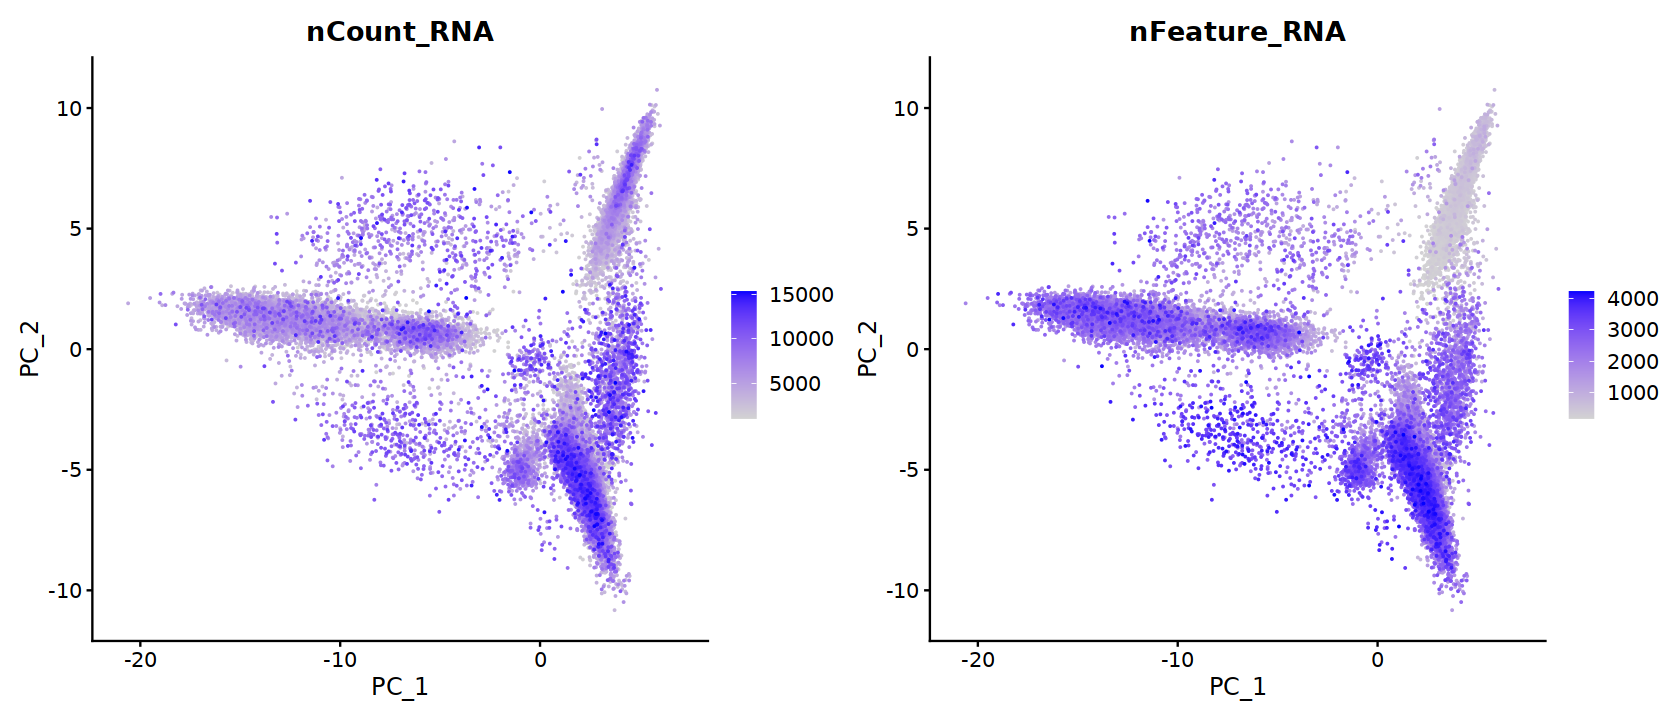

In [16]:
options(repr.plot.width = 14, repr.plot.height = 6)
FeaturePlot(object = seurat_obj, reduction = "pca",
        features = c("nCount_RNA","nFeature_RNA"), order=T)

## UMAP representation

In [17]:
comp=15

In [18]:
seurat_obj <- RunUMAP(
  seurat_obj,
  dims = 1:15,
  reduction = "pca",
  reduction.name = "umap",
  reduction.key = "UMAP_"
)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:13:20 UMAP embedding parameters a = 0.9922 b = 1.112

11:13:20 Read 39817 rows and found 15 numeric columns

11:13:20 Using Annoy for neighbor search, n_neighbors = 30

11:13:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:13:25 Writing NN index file to temp file /scratch_tmp/33937378/RtmpWKTEAW/filebe8828338309

11:13:25 Searching Annoy index using 1 thread, search_k = 3000

11:13:42 Annoy recall = 100%

11:13:42 Commencing smooth kNN distance calibration using 1 thread
 with ta

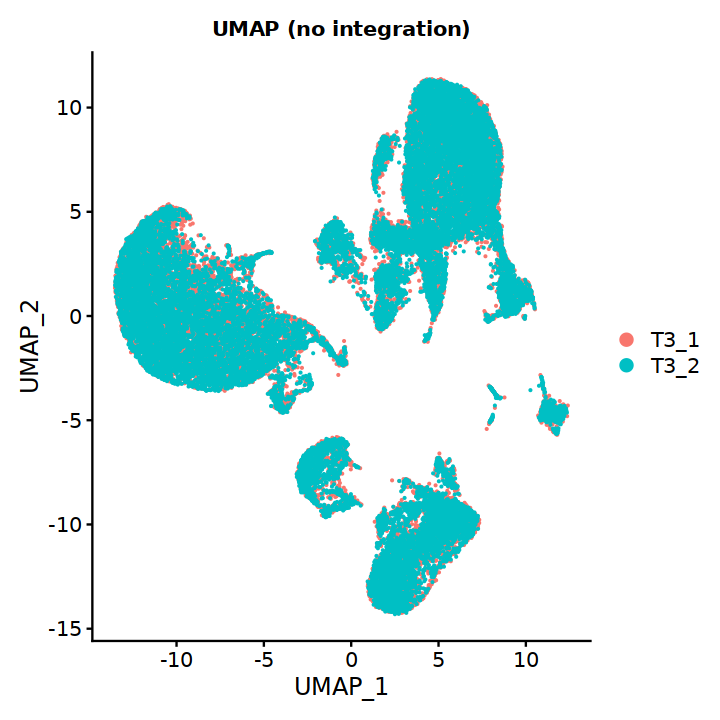

In [19]:
options(repr.plot.width = 6, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

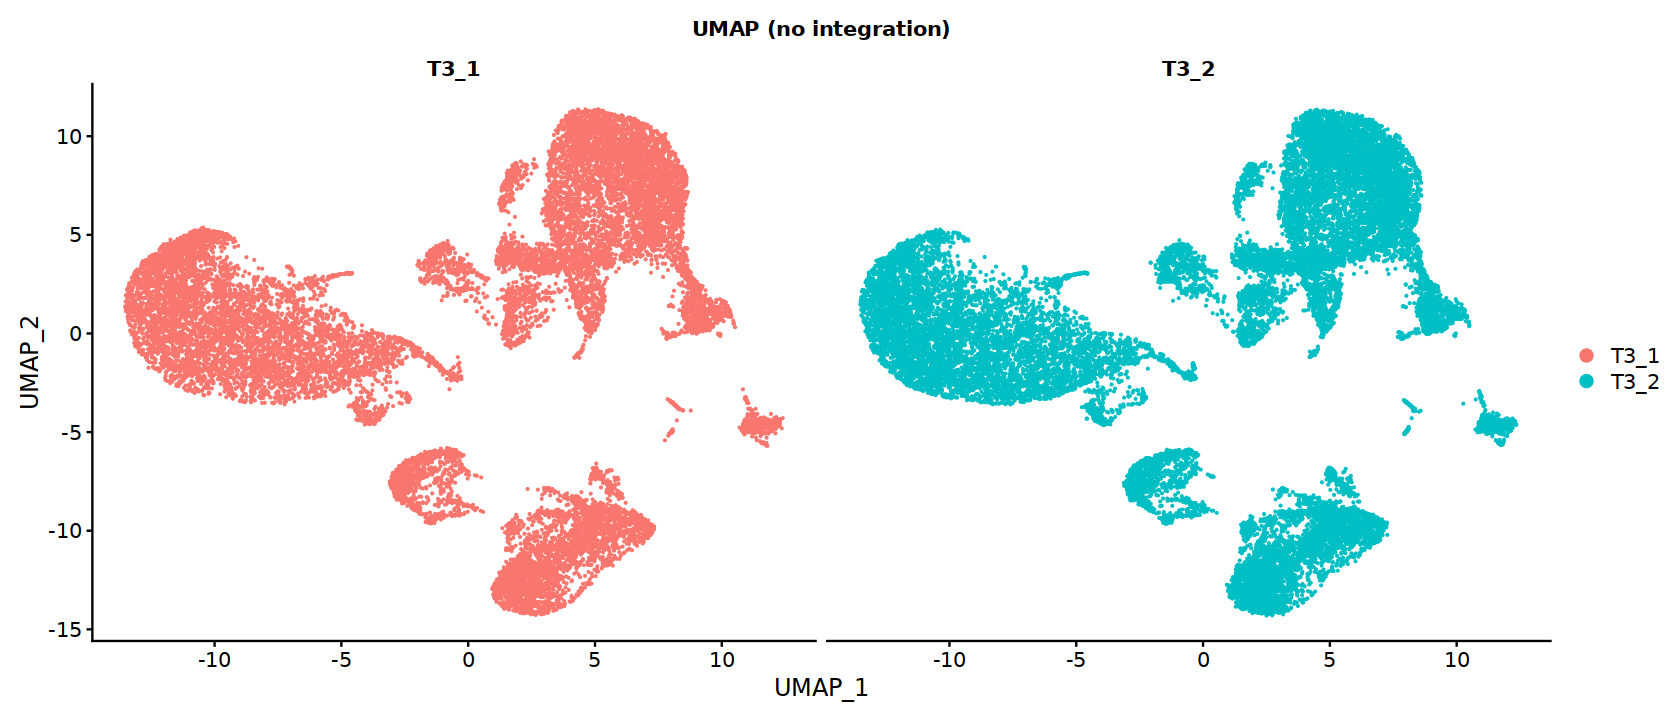

In [20]:
options(repr.plot.width = 14, repr.plot.height = 6, warn=-1,verbose = FALSE)
DimPlot(
  seurat_obj,
  reduction = "umap",
  group.by = "sample_id",
  split.by = "sample_id",
  pt.size = 0.1
) + ggtitle('UMAP (no integration)') + 
    theme(plot.title = element_text(hjust = 0.5, size = 12, face = "bold"))

## More quality checks on UMAPs

### Compute Cell-Cycle Scores

In [21]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
seurat_obj <- CellCycleScoring(seurat_obj, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

### Plot several features

In [22]:
cat_vars <-c("Phase")
con_vars <- c("nCount_RNA", "nFeature_RNA", "pct_mt", "percent.ribo", 
              "doublet_score", "PTPRC", "HBM")
vars <- c(cat_vars, con_vars)

In [23]:
# compute plots
list_plots <- lapply(vars, function(var){
  if (var %in% cat_vars) {
      p <- DimPlot(seurat_obj, reduction = "umap", group.by=var)
  } else {
      p <- FeaturePlot(seurat_obj, reduction = "umap", feature=var, order = TRUE)
  }
  return(p)
})

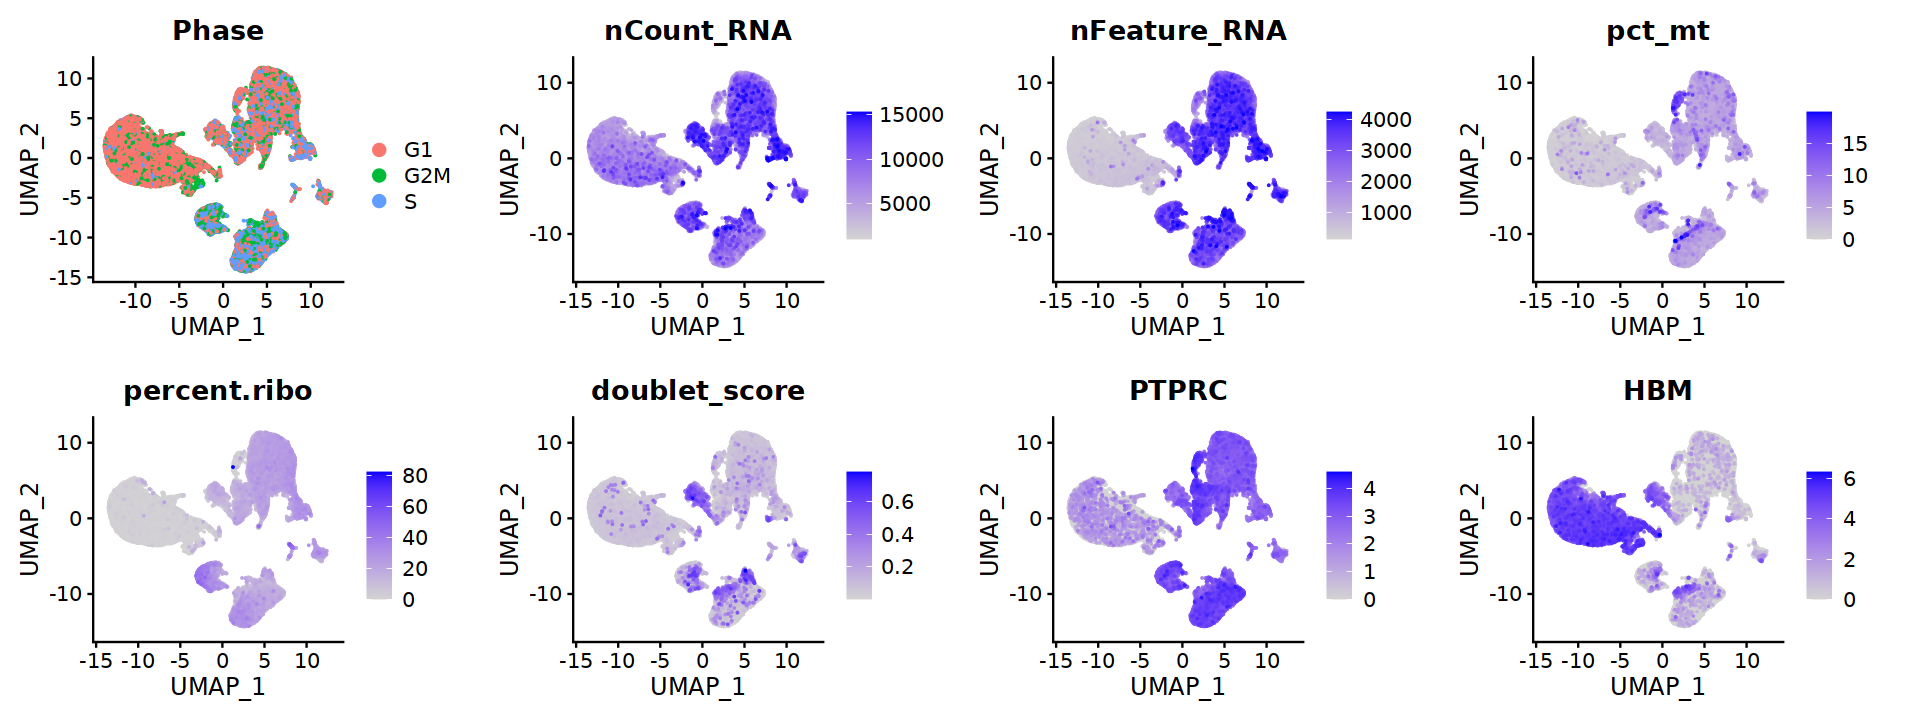

In [24]:
options(repr.plot.width = 16, repr.plot.height = 6, warn=-1,verbose = FALSE)
# show plots
cp <- cowplot::plot_grid(plotlist = list_plots,
                   align = "hv",
                   axis = "trbl",
                   ncol = 4,
                   nrow = 2)
cp

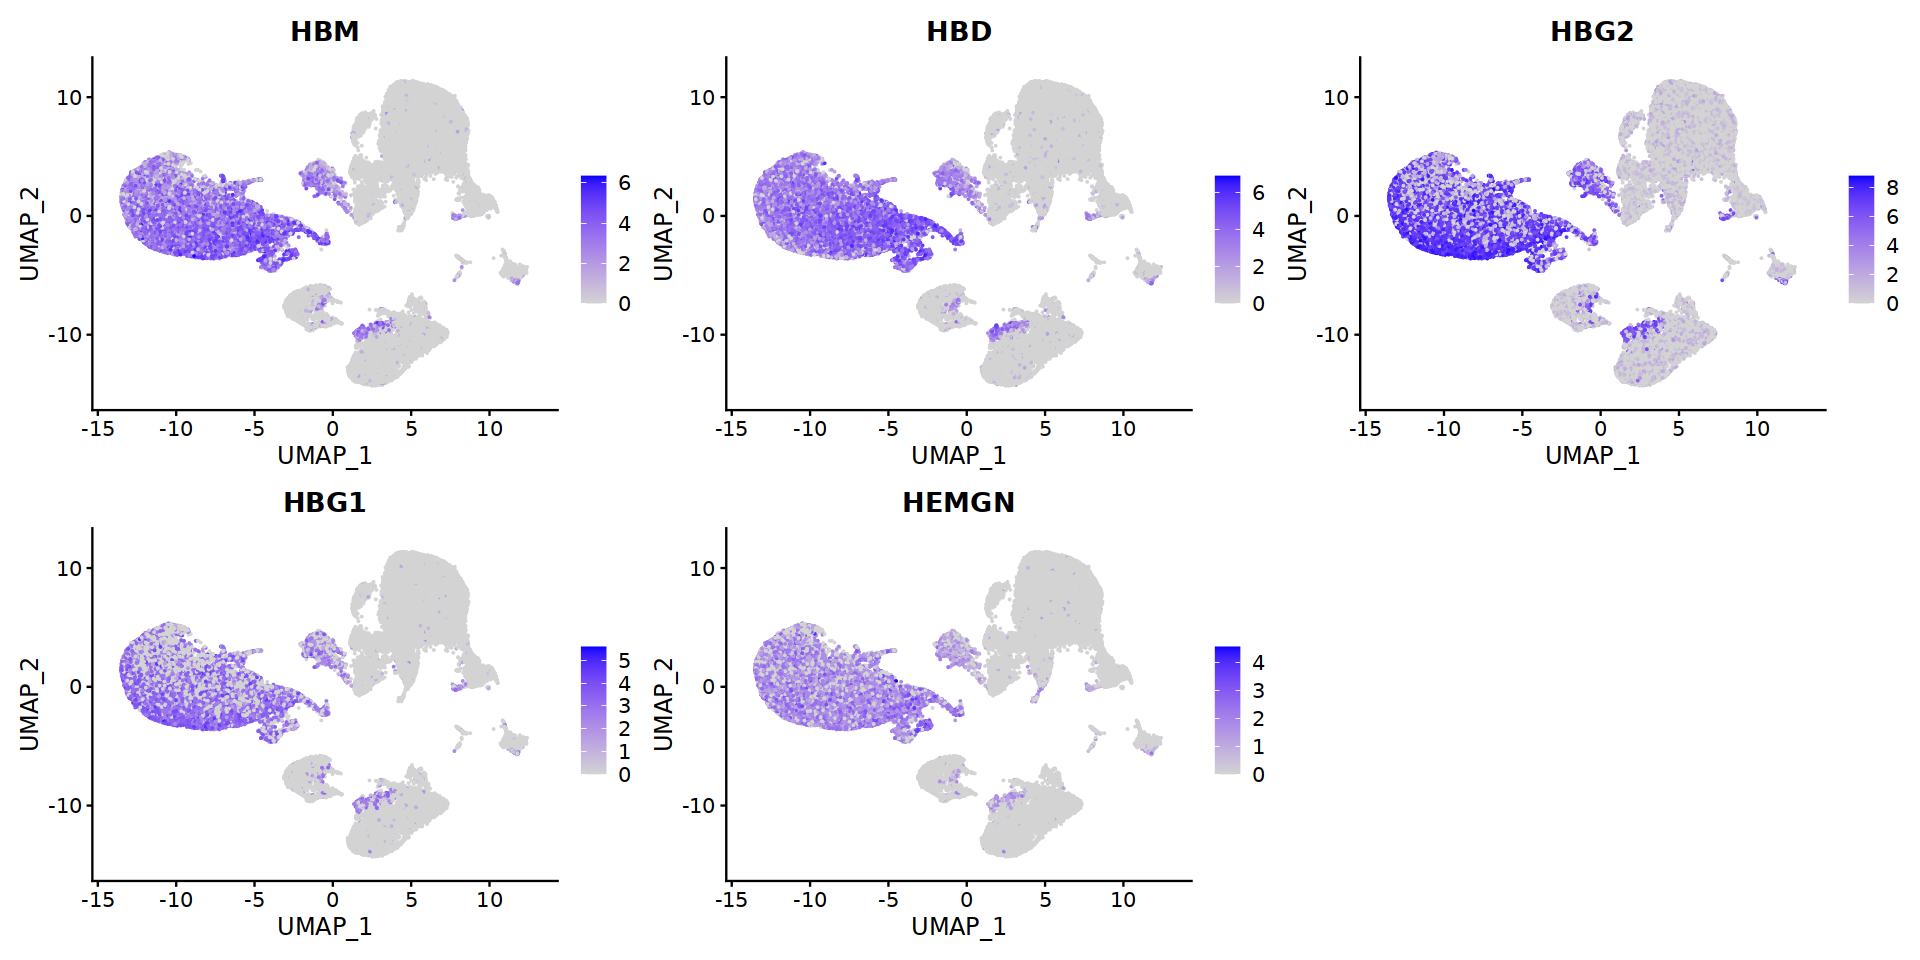

In [25]:
options(repr.plot.width = 16, repr.plot.height = 8, warn=-1,verbose = FALSE)
hemo_genes = c("HBM", "HBD", "HBG2","HBG1", "HEMGN")

FeaturePlot(seurat_obj, reduction = "umap", feature=hemo_genes, order = FALSE, ncol=3)

# Save

In [26]:
saveRDS(seurat_obj, here::here(glue::glue("{clust}/{robj_dir}/dimred_combined_object_{timepoint}.rds")))

# Session Info

In [27]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    grid      stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] scran_1.22.1                scater_1.22.0              
 [3] scuttle_1.4.0               SingleCellExperiment_1.16.0
 [5] SummarizedExperiment_1.24.0 Biobase_2.54.0             
 [7] GenomicRanges_1.46.1        GenomeInfoDb_1.30.1        
 [9] IRanges_